In [1]:
import numpy as np
from numba import jit, njit
from tqdm import tqdm
from scipy.stats import norm
from typing import *
import pandas as pd

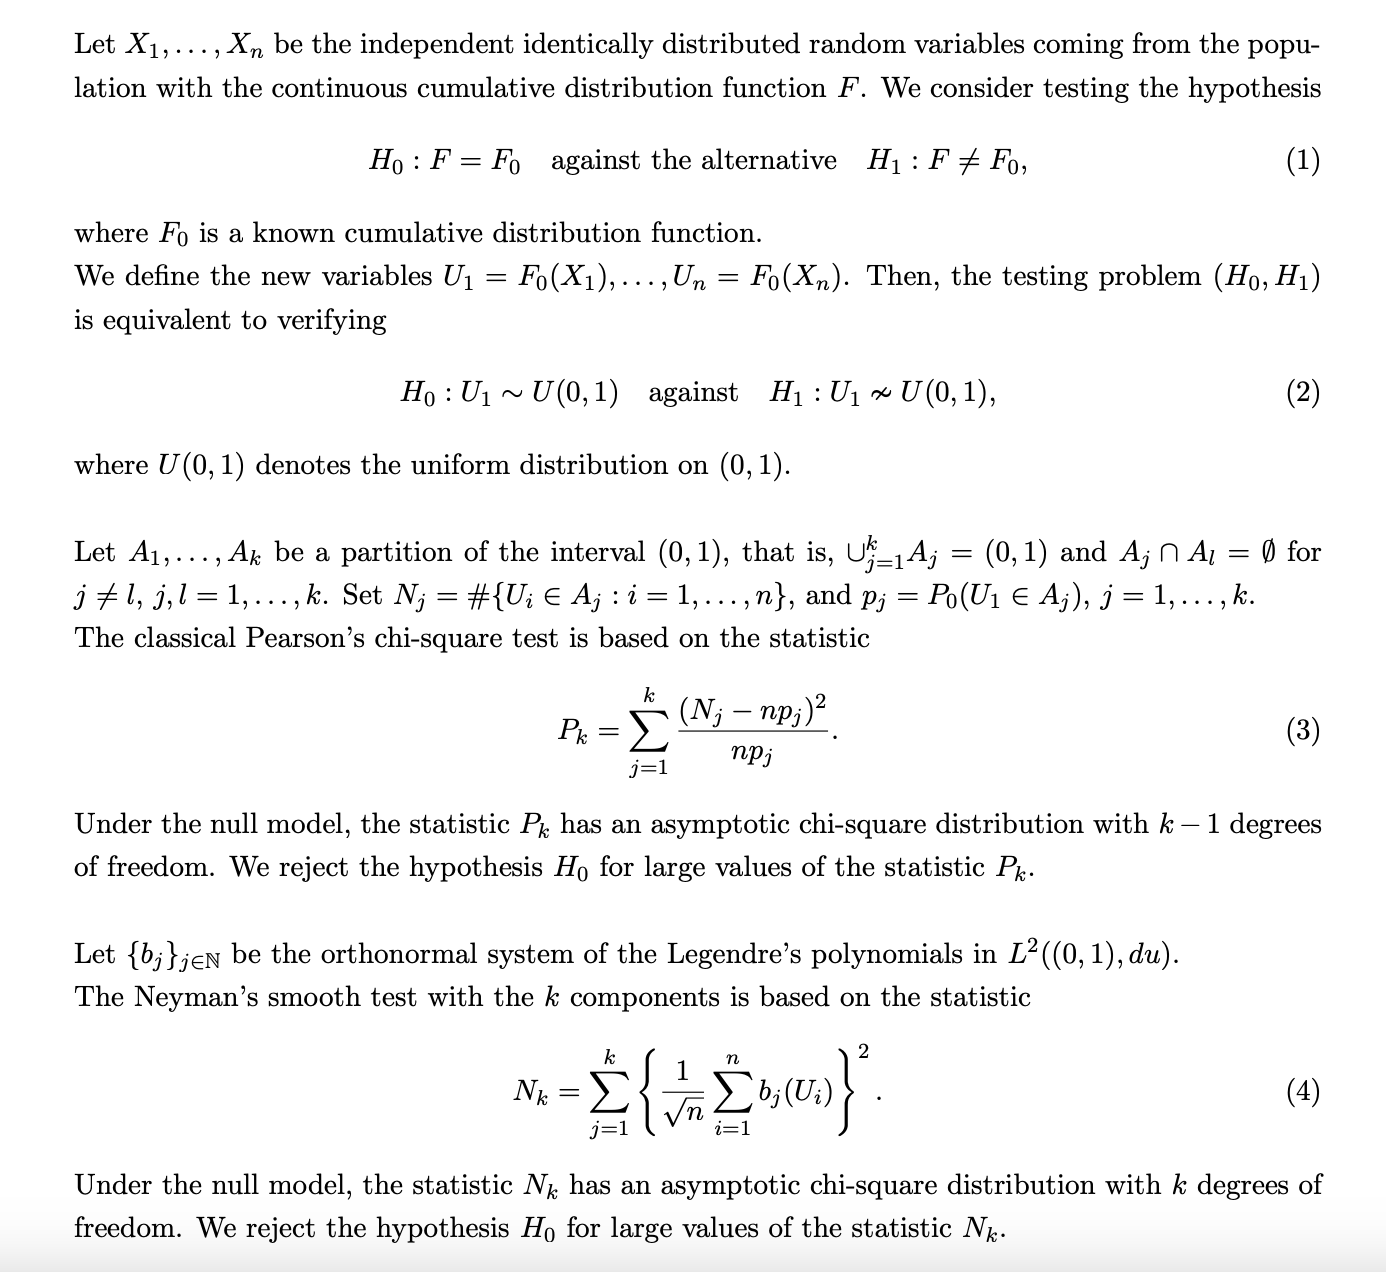

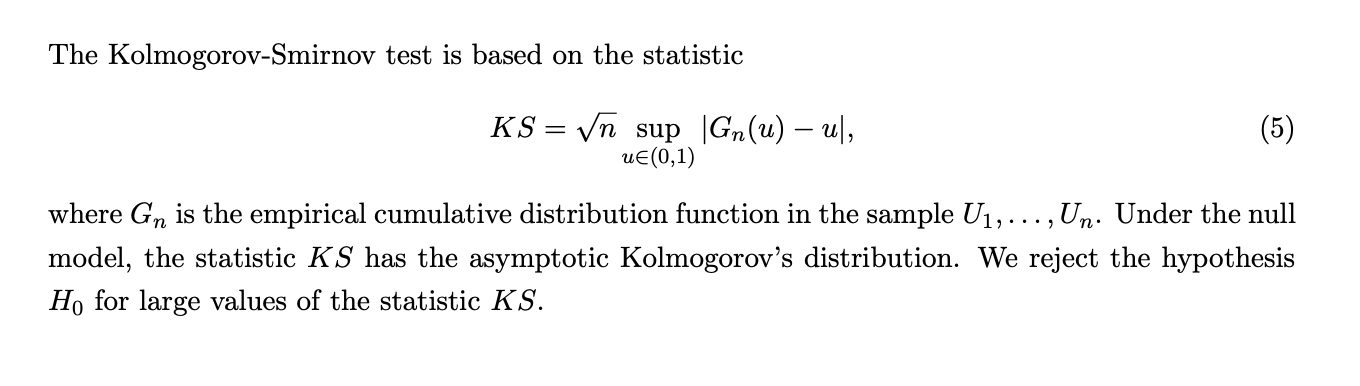

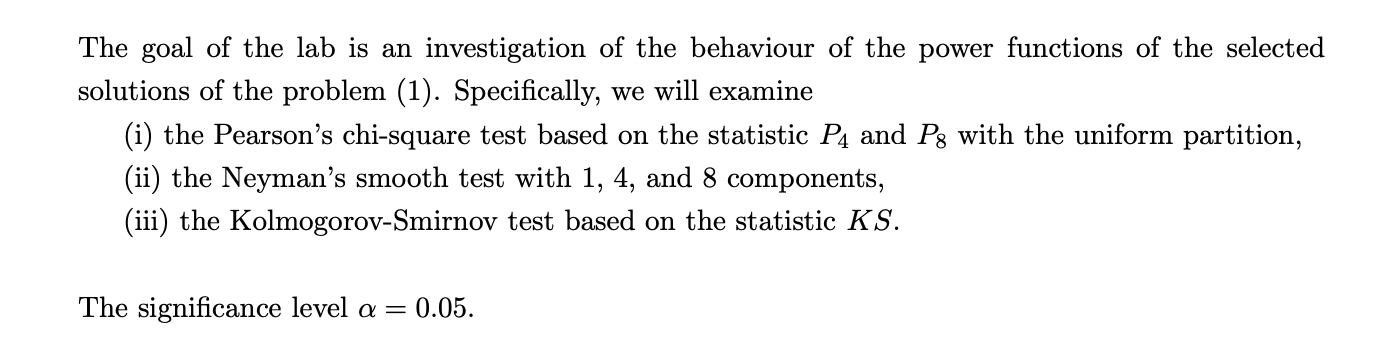

## Task 1

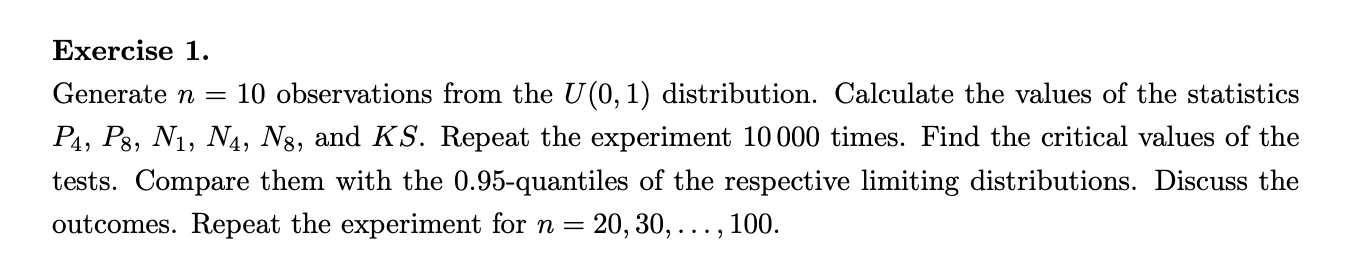

## Task 2
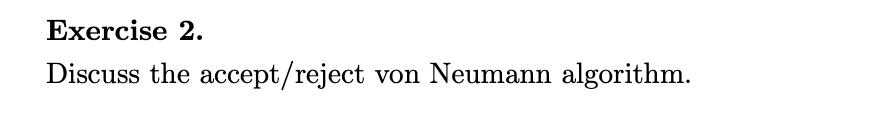

## Task 3
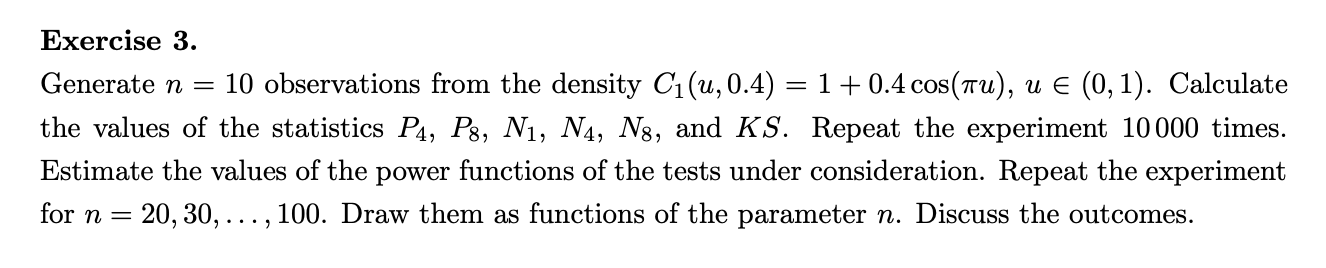

## Task 4
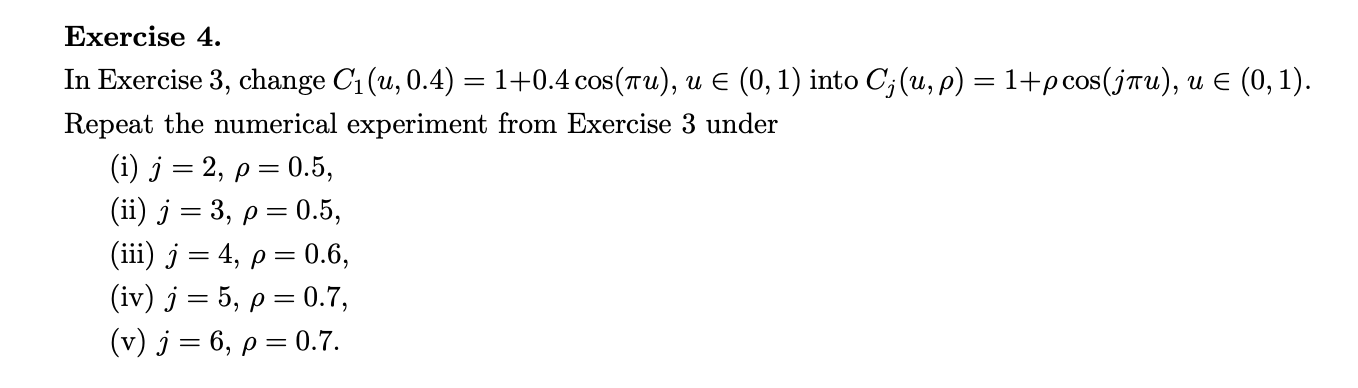